In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, learning_curve
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier


In [60]:
# Configuraciones generales
%matplotlib inline

# 1. Cargar el archivo CSV
df = pd.read_csv("diabetes.csv")
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Aplicamos el modelo de Logistic Regresion sin transformar los datos.

### Resultados del Primer Modelo Logistic Regression

#### Métricas Individuales
| Métrica                     | Valor   |
|-----------------------------|---------|
| Precisión (Accuracy)        | 0.7792  |
| Precisión Positiva          | 0.6852  |
| Exhaustividad (Recall)      | 0.6852  |
| F1-Score                    | 0.6852  |
| ROC-AUC                     | 0.8569  |

---

#### Matriz de Confusión
| Predicción \ Realidad | Outcome = 0 | Outcome = 1 |
|------------------------|-------------|-------------|
| **Predicción = 0**     | 83          | 17          |
| **Predicción = 1**     | 17          | 37          |

In [62]:
# Dividir el dataset en variables independientes (X) y dependiente (y)
X = df.drop('Outcome', axis=1)  # Eliminar la columna 'Outcome' para usar como objetivo
y = df['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de Logistic Regression
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Matriz de confusión
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas clave
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Matriz de confusión:
[[83 17]
 [17 37]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       100
           1       0.69      0.69      0.69        54

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154


Métricas individuales:
Precisión (Accuracy): 0.7792
Precisión Positiva (Precision): 0.6852
Exhaustividad (Recall): 0.6852
F1-Score: 0.6852
ROC-AUC: 0.8569


## Análisis del dataframe



### Resumen Estadístico del Dataset

| Estadística | Pregnancies | Glucose   | BloodPressure | SkinThickness | Insulin  | BMI      | DiabetesPedigreeFunction | Age      | Outcome  |
|-------------|-------------|-----------|---------------|---------------|----------|----------|--------------------------|----------|----------|
| count       | 768.000000  | 768.000000| 768.000000    | 768.000000    | 768.000000 | 768.000000 | 768.000000               | 768.000000 | 768.000000 |
| mean        | 3.845052    | 120.894531| 69.105469     | 20.536458     | 79.799479  | 31.992578 | 0.471876                 | 33.240885 | 0.348958  |
| std         | 3.369578    | 31.972618 | 19.355807     | 15.952218     | 115.244002 | 7.884160  | 0.331329                 | 11.760232 | 0.476951  |
| min         | 0.000000    | 0.000000  | 0.000000      | 0.000000      | 0.000000   | 0.000000  | 0.078000                 | 21.000000 | 0.000000  |
| 25%         | 1.000000    | 99.000000 | 62.000000     | 0.000000      | 0.000000   | 27.300000 | 0.243750                 | 24.000000 | 0.000000  |
| 50%         | 3.000000    | 117.000000| 72.000000     | 23.000000     | 30.500000  | 32.000000 | 0.372500                 | 29.000000 | 0.000000  |
| 75%         | 6.000000    | 140.250000| 80.000000     | 32.000000     | 127.250000 | 36.600000 | 0.626250                 | 41.000000 | 1.000000  |
| max         | 17.000000   | 199.000000| 122.000000    | 99.000000     | 846.000000 | 67.100000 | 2.420000                 | 81.000000 | 1.000000  |




In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Distribución de la variable objetivo Outcome

<div style="display: flex; align-items: center;">
    <table style="margin-right: 20px;">
        <thead>
            <tr>
                <th>Outcome</th>
                <th>Porcentaje (%)</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>0</td>
                <td>65.10</td>
            </tr>
            <tr>
                <td>1</td>
                <td>34.90</td>
            </tr>
        </tbody>
    </table>
    <img src="img/distribucion_Outcome.png" alt="Distribución Outcome" style="max-height: 300px;">
</div>



Distribución de Outcome (%):
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


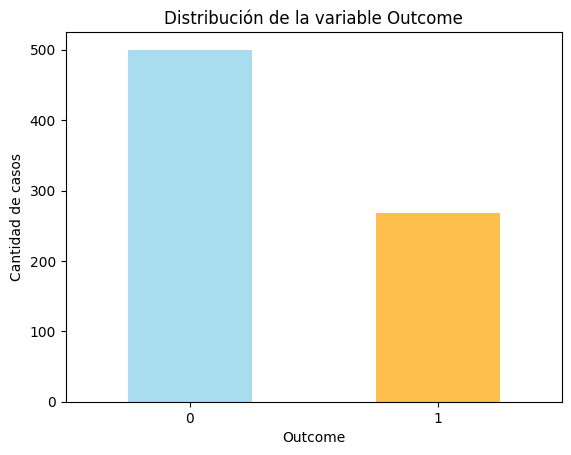

In [64]:
# Calcular la distribución de la variable Outcome
distribucion_outcome = df['Outcome'].value_counts(normalize=True) * 100
conteo_outcome = df['Outcome'].value_counts()

# Mostrar distribución en porcentaje
print("Distribución de Outcome (%):")
print(distribucion_outcome)

# Gráfico de barras para la distribución de Outcome
conteo_outcome.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.7)
plt.title("Distribución de la variable Outcome")
plt.xlabel("Outcome")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=0)
plt.show()


### Valores nulos: NO.

In [65]:
# Verificar si hay valores nulos
nulos_por_columna = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos_por_columna)

## No tenemos valores nulos

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Valores 0 y cuánto significa percentualmente sobre la columna.

<div style="display: flex; align-items: center;">
    <table style="border-collapse: collapse; margin-right: 20px;">
        <thead>
            <tr>
                <th style="border: 1px solid black; padding: 5px;">Columna</th>
                <th style="border: 1px solid black; padding: 5px;">Valores Cero</th>
                <th style="border: 1px solid black; padding: 5px;">Porcentaje (%)</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Pregnancies</td>
                <td style="border: 1px solid black; padding: 5px;">111</td>
                <td style="border: 1px solid black; padding: 5px;">14.45</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Glucose</td>
                <td style="border: 1px solid black; padding: 5px;">5</td>
                <td style="border: 1px solid black; padding: 5px;">0.65</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">BloodPressure</td>
                <td style="border: 1px solid black; padding: 5px;">35</td>
                <td style="border: 1px solid black; padding: 5px;">4.56</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">SkinThickness</td>
                <td style="border: 1px solid black; padding: 5px;">227</td>
                <td style="border: 1px solid black; padding: 5px;">29.56</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Insulin</td>
                <td style="border: 1px solid black; padding: 5px;">374</td>
                <td style="border: 1px solid black; padding: 5px;">48.70</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">BMI</td>
                <td style="border: 1px solid black; padding: 5px;">11</td>
                <td style="border: 1px solid black; padding: 5px;">1.43</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">DiabetesPedigreeFunction</td>
                <td style="border: 1px solid black; padding: 5px;">0</td>
                <td style="border: 1px solid black; padding: 5px;">0.00</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Age</td>
                <td style="border: 1px solid black; padding: 5px;">0</td>
                <td style="border: 1px solid black; padding: 5px;">0.00</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Outcome</td>
                <td style="border: 1px solid black; padding: 5px;">500</td>
                <td style="border: 1px solid black; padding: 5px;">65.10</td>
            </tr>
        </tbody>
    </table>
    <img src="img/dist_valorescero_por.png" alt="Distribución gráfica" style="max-height: 350px;">
</div>


### Análisis por columna y tratamiento de valores cero

| Columna                  | Significado del valor cero | ¿Necesita tratamiento? | Recomendación de tratamiento     |
|--------------------------|---------------------------|-------------------------|-----------------------------------|
| Pregnancies              | Puede ser un valor válido (nunca embarazada) | No                      | N/A                               |
| Glucose                  | No es fisiológicamente posible               | Sí                      | Sustituir por la mediana          |
| BloodPressure            | No es realista                               | Sí                      | Sustituir por la mediana          |
| SkinThickness            | Probablemente indica dato faltante           | Sí                      | Sustituir por la mediana          |
| Insulin                  | Ausencia de medición o falta de insulina     | Estudiar el caso        | A estudiar.          |
| BMI                      | No es posible                                | Sí                      | Sustituir por la mediana          |
| DiabetesPedigreeFunction | No hay valores cero                          | No                      | N/A                               |
| Age                      | No hay valores cero                          | No                      | N/A                               |
| Outcome                  | Valor válido (no tiene diabetes)             | No                      | N/A                               |


Valores cero y su porcentaje por columna:
                          Valores Cero  Porcentaje (%)
Pregnancies                        111       14.453125
Glucose                              5        0.651042
BloodPressure                       35        4.557292
SkinThickness                      227       29.557292
Insulin                            374       48.697917
BMI                                 11        1.432292
DiabetesPedigreeFunction             0        0.000000
Age                                  0        0.000000
Outcome                            500       65.104167


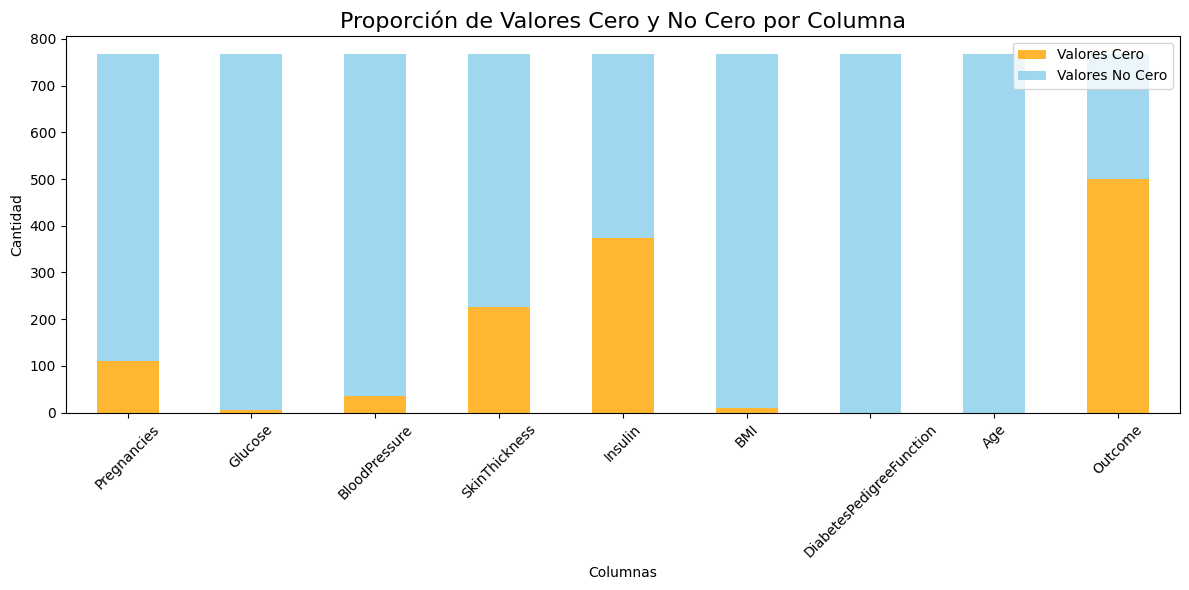

In [66]:
# Contar valores 0 en cada columna (excepto Outcome, que podría ser un valor válido)
valores_cero = (df == 0).sum()

# Calcular el porcentaje de valores cero en cada columna
porcentaje_cero = (valores_cero / len(df)) * 100

# Crear un DataFrame para mostrar los resultados
resultados_cero = pd.DataFrame({
    'Valores Cero': valores_cero,
    'Porcentaje (%)': porcentaje_cero
})

# Mostrar el DataFrame
print("Valores cero y su porcentaje por columna:")
print(resultados_cero)

# Calcular valores no cero
valores_no_cero = len(df) - valores_cero

# Crear el DataFrame para las proporciones
proporciones = pd.DataFrame({
    'Valores Cero': valores_cero,
    'Valores No Cero': valores_no_cero
})

# Crear el gráfico de barras apiladas
proporciones.plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'skyblue'], alpha=0.8)
plt.title('Proporción de Valores Cero y No Cero por Columna', fontsize=16)
plt.ylabel('Cantidad')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Estudiamos el caso de la columna `Insulim` --> **`Decisión inicial: Tratar como datos faltantes y sustituirlos por la mediana`**
Para personas con `diabetes tipo 1`, su páncreas no produce insulina, por lo que un valor de insulina igual a 0 podría ser válido en este contexto.

Como no tenemos información del dataset y no podemos diferenciar si es sin medición o no, vamos a comprobar la correlación de `Insulum` con `Outcome`.

**`Distribución y Valoración de la Correlación entre Insulin y Outcome`**

| Métrica                           | Outcome = 0 (%) | Outcome = 1 (%) | Observación                                                                                 |
|-----------------------------------|-----------------|-----------------|---------------------------------------------------------------------------------------------|
| **Distribución general de Outcome** | 65.10          | 34.90          | La distribución general muestra más casos sin diabetes (Outcome = 0).                      |
| **Distribución para Insulin = 0** | 63.10          | 36.90          | Similar a la distribución general, pero con un ligero aumento en casos con diabetes (Outcome = 1). |

**`Valoración`**
1. **Similitud entre distribuciones**:
   - La proporción de `Outcome` para los casos de `Insulin = 0` es similar a la distribución general del dataset.
   - Esto indica que los valores de `Insulin = 0` no están fuertemente asociados con `Outcome = 1` (diabetes).

2. **Interpretación de `Insulin = 0`**:
   - Es poco probable que `Insulin = 0` represente una condición clínica válida (como ausencia de insulina en diabetes tipo 1).
   - Es más probable que estos ceros sean datos faltantes o casos no medidos.

3. **Recomendación**:
   - Tratar los valores `Insulin = 0` como datos faltantes y sustituirlos por la **mediana** parece una opción razonable.
   - Sin embargo, si hay información adicional o contexto clínico, podrías ajustar este enfoque.



In [67]:
# Analizar la correlación entre Insulin = 0 y Outcome
correlacion_insulin_outcome = df[df['Insulin'] == 0]['Outcome'].value_counts(normalize=True) * 100

print("Distribución de Outcome para valores de Insulin = 0 (%):")
print(correlacion_insulin_outcome)


Distribución de Outcome para valores de Insulin = 0 (%):
Outcome
0    63.101604
1    36.898396
Name: proportion, dtype: float64


## Tratamiento de datos

### Tratamiento de los valores 0 de `['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']` - `¡Insulin no incluida!`

- **NO OBSERVAMOS DIFERENCIAS AL NO TRATAR LA COLUMNA INSULIN**

- **POR LO TANTO SEGUIREMOS UTILIZANDO EL MODELO CON INSULIN TRATADA**

In [68]:
# Crear un nuevo dataframe para tratar valores cero excepto en la columna 'Insulin'
df_sin_tratar_insulin = df.copy()

# Lista de columnas a tratar (excluyendo 'Insulin')
columnas_a_tratar = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

# Sustituir valores 0 por la mediana en las columnas seleccionadas
for columna in columnas_a_tratar:
    mediana = df_sin_tratar_insulin[columna].median()  # Calcular la mediana de la columna
    df_sin_tratar_insulin[columna] = df_sin_tratar_insulin[columna].replace(0, mediana)  # Sustituir valores 0 por la mediana

print("Valores cero tratados (excepto en 'Insulin') en el nuevo dataframe 'df_sin_tratar_insulin'.")


Valores cero tratados (excepto en 'Insulin') en el nuevo dataframe 'df_sin_tratar_insulin'.


In [69]:
df_sin_tratar_insulin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
# Dividir el nuevo dataset en variables independientes (X) y dependiente (y)
X = df_sin_tratar_insulin.drop('Outcome', axis=1)  # Eliminar la columna 'Outcome' para usar como objetivo
y = df_sin_tratar_insulin['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de Logistic Regression
modelo = LogisticRegression(max_iter=300)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Matriz de confusión
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas clave
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Matriz de confusión:
[[86 14]
 [17 37]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154


Métricas individuales:
Precisión (Accuracy): 0.7987
Precisión Positiva (Precision): 0.7255
Exhaustividad (Recall): 0.6852
F1-Score: 0.7048
ROC-AUC: 0.8630


### Tratamiento de los valores 0 de `['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']`

In [71]:
# Crear un nuevo dataframe para el tratamiento de valores cero
df_tratamiento_ceros = df.copy()

# Lista de columnas a tratar
columnas_a_tratar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Sustituir valores 0 por la mediana en las columnas seleccionadas
for columna in columnas_a_tratar:
    mediana = df_tratamiento_ceros[columna].median()  # Calcular la mediana de la columna
    df_tratamiento_ceros[columna] = df_tratamiento_ceros[columna].replace(0, mediana)  # Sustituir valores 0 por la mediana

print("Valores cero tratados con la mediana en el nuevo dataframe 'df_tratamiento_ceros'.")


Valores cero tratados con la mediana en el nuevo dataframe 'df_tratamiento_ceros'.


In [72]:
df_tratamiento_ceros.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Aplicamos el modelo Logistic Regresion DESPUÉS DE TRATAR LOS VALORES 0.



### Comparación de Métricas del Modelo Logistic Regression

| Métrica                     | Antes del Tratamiento | Después del Tratamiento | Interpretación                                                                 |
|-----------------------------|-----------------------|--------------------------|--------------------------------------------------------------------------------|
| **Precisión (Accuracy)**    | 0.7792               | 0.7987                  | Mejora después del tratamiento.                                               |
| **Precisión Positiva**      | 0.6852               | 0.7255                  | Incrementa significativamente, indicando menos falsos positivos.              |
| **Exhaustividad (Recall)**  | 0.6852               | 0.6852                  | Se mantiene igual, mostrando que la capacidad de detectar casos positivos no cambia. |
| **F1-Score**                | 0.6852               | 0.7048                  | Mejora, reflejando un mejor balance entre precisión y recall.                 |
| **ROC-AUC**                 | 0.8569               | 0.8630                  | Incrementa ligeramente, indicando una mejora en la capacidad discriminativa.  |

---

### Matriz de Confusión

| Estado                      | Predicción \ Realidad | Outcome = 0 | Outcome = 1 |
|-----------------------------|------------------------|-------------|-------------|
| **Antes del Tratamiento**   | **Predicción = 0**     | 83          | 17          |
|                             | **Predicción = 1**     | 17          | 37          |
| **Después del Tratamiento** | **Predicción = 0**     | 86          | 14          |
|                             | **Predicción = 1**     | 17          | 37          |


In [73]:
# Dividir el dataset tratado en variables independientes (X) y dependiente (y)
X = df_tratamiento_ceros.drop('Outcome', axis=1)  # Eliminar la columna 'Outcome' para usar como objetivo
y = df_tratamiento_ceros['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de Logistic Regression
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Matriz de confusión
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas clave
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Matriz de confusión:
[[86 14]
 [17 37]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154


Métricas individuales:
Precisión (Accuracy): 0.7987
Precisión Positiva (Precision): 0.7255
Exhaustividad (Recall): 0.6852
F1-Score: 0.7048
ROC-AUC: 0.8630


---

## Buscamos las variables con más correlación con Outcome.

### Correlación de Variables con Outcome

<div style="display: flex; align-items: flex-start;">
    <table style="border-collapse: collapse; margin-right: 20px;">
        <thead>
            <tr>
                <th style="border: 1px solid black; padding: 5px;">Variable</th>
                <th style="border: 1px solid black; padding: 5px;">Correlación</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Glucose</td>
                <td style="border: 1px solid black; padding: 5px;">0.4928</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">BMI</td>
                <td style="border: 1px solid black; padding: 5px;">0.3122</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Age</td>
                <td style="border: 1px solid black; padding: 5px;">0.2384</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Pregnancies</td>
                <td style="border: 1px solid black; padding: 5px;">0.2219</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">SkinThickness</td>
                <td style="border: 1px solid black; padding: 5px;">0.1891</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">DiabetesPedigreeFunction</td>
                <td style="border: 1px solid black; padding: 5px;">0.1738</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">BloodPressure</td>
                <td style="border: 1px solid black; padding: 5px;">0.1657</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 5px;">Insulin</td>
                <td style="border: 1px solid black; padding: 5px;">0.1485</td>
            </tr>
        </tbody>
    </table>
    <img src="img/grafica_correlacion.png" alt="Gráfica de Correlación" style="max-height: 350px;">
</div>


### Variables Seleccionadas para el Modelo

| Variable     | Correlación | Razón de Selección                                        |
|--------------|-------------|----------------------------------------------------------|
| **Glucose**  | 0.4928      | Indicador principal de diabetes, correlación más alta.    |
| **BMI**      | 0.3122      | Relacionado con resistencia a la insulina y diabetes tipo 2. |
| **Age**      | 0.2384      | Factor de riesgo significativo para diabetes.            |
| **Pregnancies** | 0.2219   | Asociado con diabetes gestacional.                       |

**Nuevo dataframe: df_variables_corr**


Correlaciones con 'Outcome':
Glucose                     0.492782
BMI                         0.312249
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.189065
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.148457
Name: Outcome, dtype: float64


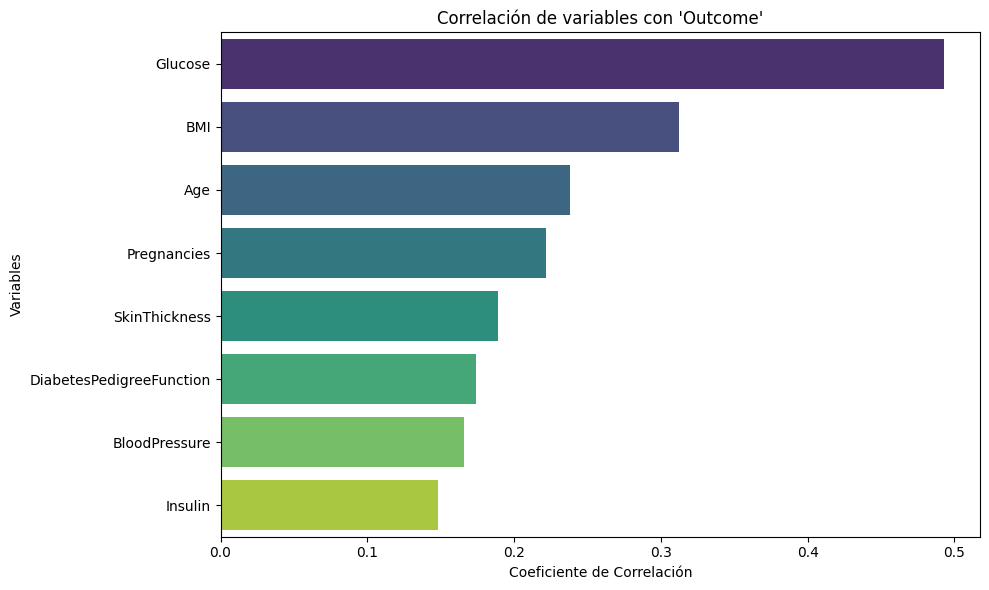

In [74]:
# Calcular la matriz de correlación
correlacion = df_tratamiento_ceros.corr()

# Ordenar las correlaciones con respecto a 'Outcome' y excluir 'Outcome' mismo
correlacion_outcome = correlacion['Outcome'].drop('Outcome').sort_values(ascending=False)

# Imprimir las correlaciones más altas
print("Correlaciones con 'Outcome':")
print(correlacion_outcome)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacion_outcome.values, y=correlacion_outcome.index, palette="viridis")
plt.title("Correlación de variables con 'Outcome'")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

In [75]:
# Lista de variables seleccionadas
variables_seleccionadas = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']

# Crear un nuevo dataframe con solo las variables seleccionadas
df_variables_corr = df_tratamiento_ceros[variables_seleccionadas]

print("Nuevo dataframe creado con las variables seleccionadas:")
print(df_variables_corr.head())

Nuevo dataframe creado con las variables seleccionadas:
   Glucose   BMI  Age  Pregnancies  Outcome
0      148  33.6   50            6        1
1       85  26.6   31            1        0
2      183  23.3   32            8        1
3       89  28.1   21            1        0
4      137  43.1   33            0        1


### Calculamos el modelo utilizando sólo las variables con mayor correlación: `Glucose, BMI, Age, Pregnancies`

- **No apreciamos mejoras**

In [76]:
# Dividir el nuevo dataframe en variables independientes (X) y dependiente (y)
X = df_variables_corr.drop('Outcome', axis=1)  # Eliminar la columna 'Outcome' para usar como objetivo
y = df_variables_corr['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de Logistic Regression
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Matriz de confusión
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas clave
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Matriz de confusión:
[[86 14]
 [17 37]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154


Métricas individuales:
Precisión (Accuracy): 0.7987
Precisión Positiva (Precision): 0.7255
Exhaustividad (Recall): 0.6852
F1-Score: 0.7048
ROC-AUC: 0.8563


## Aplicamos `balanced` al `df_variables_corr` y `df_tratamiento_ceros`

###  `dt_tramiento_ceros`


In [106]:
# Dividir el dataframe en variables independientes (X) y dependiente (y)
X = df_tratamiento_ceros.drop('Outcome', axis=1)
y = df_tratamiento_ceros['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de Logistic Regression con class_weight='balanced'
modelo_balanceado_ceros = LogisticRegression(max_iter=200, class_weight='balanced')
modelo_balanceado_ceros.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_balanceado_ceros.predict(X_test)

# Matriz de confusión
print("Resultados para df_tratamiento_ceros con class_weight='balanced':")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas clave
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo_balanceado_ceros.predict_proba(X_test)[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Resultados para df_tratamiento_ceros con class_weight='balanced':

Matriz de confusión:
[[76 24]
 [ 9 45]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       100
           1       0.65      0.83      0.73        54

    accuracy                           0.79       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.81      0.79      0.79       154


Métricas individuales:
Precisión (Accuracy): 0.7857
Precisión Positiva (Precision): 0.6522
Exhaustividad (Recall): 0.8333
F1-Score: 0.7317
ROC-AUC: 0.8641


### `df_variables_corr`

In [78]:
# Dividir el dataframe en variables independientes (X) y dependiente (y)
X = df_variables_corr.drop('Outcome', axis=1)
y = df_variables_corr['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de Logistic Regression con class_weight='balanced'
modelo_balanceado_corr = LogisticRegression(max_iter=200, class_weight='balanced')
modelo_balanceado_corr.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_balanceado_corr.predict(X_test)

# Matriz de confusión
print("Resultados para df_variables_corr con class_weight='balanced':")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas clave
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modelo_balanceado_corr.predict_proba(X_test)[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Resultados para df_variables_corr con class_weight='balanced':

Matriz de confusión:
[[73 27]
 [ 9 45]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       100
           1       0.62      0.83      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.77      0.77       154


Métricas individuales:
Precisión (Accuracy): 0.7662
Precisión Positiva (Precision): 0.6250
Exhaustividad (Recall): 0.8333
F1-Score: 0.7143
ROC-AUC: 0.8554


### Resultados de aplicación de `balanced`

**Comparación de Métricas del Modelo Logistic Regression**

| Métrica                     | Antes del Tratamiento | Después del Tratamiento | **Con Balanced (`df_tratamiento_ceros`)** | Con Balanced (`df_variables_corr`) | Interpretación                                                                 |
|-----------------------------|-----------------------|--------------------------|----------------------------------------|--------------------------------------|--------------------------------------------------------------------------------|
| **Precisión (Accuracy)**    | 0.7792               | 0.7987                  | **0.7857**                                 | 0.7662                               | Precisión general disminuye ligeramente con balanced debido al ajuste de clases. |
| **Precisión Positiva**      | 0.6852               | 0.7255                  | **0.6522**                                 | 0.6250                               | Menor precisión positiva con balanced, prioriza más casos positivos.          |
| **Exhaustividad (Recall)**  | 0.6852               | 0.6852                  | **0.8333**                                 | 0.8333                               | Recall mejora significativamente con balanced, capturando más casos positivos. |
| **F1-Score**                | 0.6852               | 0.7048                  | **0.7317**                                 | 0.7143                               | Mejor balance entre precisión y recall con balanced.                          |
| **ROC-AUC**                 | 0.8569               | 0.8630                  | **0.8641**                                 | 0.8554                               | ROC-AUC se mantiene alto, indicando buena capacidad discriminativa.           |

---

### Matriz de Confusión

| Estado                      | Predicción \ Realidad | Outcome = 0 | Outcome = 1 |
|-----------------------------|------------------------|-------------|-------------|
| **Antes del Tratamiento**   | **Predicción = 0**     | 83          | 17          |
|                             | **Predicción = 1**     | 17          | 37          |
| **Después del Tratamiento** | **Predicción = 0**     | 86          | 14          |
|                             | **Predicción = 1**     | 17          | 37          |
| **Con Balanced (`df_tratamiento_ceros`)** | **Predicción = 0** | 76          | 24          |
|                             | **Predicción = 1**     | 9           | 45          |
| **Con Balanced (`df_variables_corr`)** | **Predicción = 0** | 73          | 27          |
|                             | **Predicción = 1**     | 9           | 45          |


## Validación cruzada

`cv=5`

- **No mejoramos los resultados**

In [79]:
# Dividir el dataframe en variables independientes (X) y dependiente (y)
X = df_tratamiento_ceros.drop('Outcome', axis=1)
y = df_tratamiento_ceros['Outcome']

# Crear el modelo con class_weight='balanced'
modelo_balanceado = LogisticRegression(max_iter=300, class_weight='balanced')

# Realizar validación cruzada para obtener las puntuaciones de precisión
cv_scores = cross_val_score(modelo_balanceado, X, y, cv=5, scoring='accuracy')

# Realizar predicciones utilizando validación cruzada
y_pred = cross_val_predict(modelo_balanceado, X, y, cv=5)

# Realizar predicciones de probabilidad
y_proba = cross_val_predict(modelo_balanceado, X, y, cv=5, method='predict_proba')

# Matriz de confusión
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y, y_pred))

# Métricas clave
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_proba[:, 1])

# Imprimir métricas individuales
print("\nMétricas individuales:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Imprimir los resultados de la validación cruzada
print("\nResultados de la validación cruzada (Precisión):")
print(cv_scores)

# Precisión media de la validación cruzada
print(f"\nPrecisión media de la validación cruzada: {np.mean(cv_scores):.4f}")


Matriz de confusión:
[[387 113]
 [ 75 193]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       500
           1       0.63      0.72      0.67       268

    accuracy                           0.76       768
   macro avg       0.73      0.75      0.74       768
weighted avg       0.77      0.76      0.76       768


Métricas individuales:
Precisión (Accuracy): 0.7552
Precisión Positiva (Precision): 0.6307
Exhaustividad (Recall): 0.7201
F1-Score: 0.6725
ROC-AUC: 0.8368

Resultados de la validación cruzada (Precisión):
[0.75324675 0.69480519 0.74025974 0.83006536 0.75816993]

Precisión media de la validación cruzada: 0.7553


---

# Conclusión

- **Hemos obtenido el mejor resultado tras el tratamiento de los valores 0 y de balancear el modelo.**

| Métrica                     | Antes del Tratamiento | Después del Tratamiento | **Con Balanced (`df_tratamiento_ceros`)** | Con Balanced (`df_variables_corr`) | Interpretación                                                                 |
|-----------------------------|-----------------------|--------------------------|----------------------------------------|--------------------------------------|--------------------------------------------------------------------------------|
| **Precisión (Accuracy)**    | 0.7792               | 0.7987                  | **0.7857**                                 | 0.7662                               | Precisión general disminuye ligeramente con balanced debido al ajuste de clases. |
| **Precisión Positiva**      | 0.6852               | 0.7255                  | **0.6522**                                 | 0.6250                               | Menor precisión positiva con balanced, prioriza más casos positivos.          |
| **Exhaustividad (Recall)**  | 0.6852               | 0.6852                  | **0.8333**                                 | 0.8333                               | Recall mejora significativamente con balanced, capturando más casos positivos. |
| **F1-Score**                | 0.6852               | 0.7048                  | **0.7317**                                 | 0.7143                               | Mejor balance entre precisión y recall con balanced.                          |
| **ROC-AUC**                 | 0.8569               | 0.8630                  | **0.8641**                                 | 0.8554                               | ROC-AUC se mantiene alto, indicando buena capacidad discriminativa.           |

---
`Matriz de Confusión`

| Estado                      | Predicción \ Realidad | Outcome = 0 | Outcome = 1 |
|-----------------------------|------------------------|-------------|-------------|
| **Antes del Tratamiento**   | **Predicción = 0**     | 83          | 17          |
|                             | **Predicción = 1**     | 17          | 37          |
| **Después del Tratamiento** | **Predicción = 0**     | 86          | 14          |
|                             | **Predicción = 1**     | 17          | 37          |
| **Con Balanced (`df_tratamiento_ceros`)** | **Predicción = 0** | 76          | 24          |
|                             | **Predicción = 1**     | 9           | 45          |
| **Con Balanced (`df_variables_corr`)** | **Predicción = 0** | 73          | 27          |
|                             | **Predicción = 1**     | 9           | 45          |

---

## Regularización


### liblinear


In [108]:
# Dividir el dataframe en variables independientes (X) y dependiente (y)
X = df_tratamiento_ceros.drop('Outcome', axis=1)
y = df_tratamiento_ceros['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear el modelo de Logistic Regression con class_weight='balanced' y regularización L1 (con liblinear)
modelo_liblinear = LogisticRegression(max_iter=200, class_weight='balanced', solver='liblinear', penalty='l2')  # Usando L2 regularization (Ridge)
modelo_liblinear.fit(X_train, y_train)

# Realizar predicciones
y_pred_liblinear = modelo_liblinear.predict(X_test)

# Calcular métricas
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)
precision_liblinear = precision_score(y_test, y_pred_liblinear)
recall_liblinear = recall_score(y_test, y_pred_liblinear)
f1_liblinear = f1_score(y_test, y_pred_liblinear)
roc_auc_liblinear = roc_auc_score(y_test, modelo_liblinear.predict_proba(X_test)[:, 1])

# Imprimir métricas
print("Resultados con `liblinear`:")
print(f"Precisión (Accuracy): {accuracy_liblinear:.4f}")
print(f"Precisión Positiva (Precision): {precision_liblinear:.4f}")
print(f"Exhaustividad (Recall): {recall_liblinear:.4f}")
print(f"F1-Score: {f1_liblinear:.4f}")
print(f"ROC-AUC: {roc_auc_liblinear:.4f}")

Resultados con `liblinear`:
Precisión (Accuracy): 0.7792
Precisión Positiva (Precision): 0.6515
Exhaustividad (Recall): 0.7963
F1-Score: 0.7167
ROC-AUC: 0.8548


### lbfgs

In [109]:
# Dividir el dataframe en variables independientes (X) y dependiente (y)
X = df_tratamiento_ceros.drop('Outcome', axis=1)
y = df_tratamiento_ceros['Outcome']

# Dividir el dataset en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear el modelo de Logistic Regression con class_weight='balanced' y regularización L2 (con lbfgs)
modelo_lbfgs = LogisticRegression(max_iter=200, class_weight='balanced', solver='lbfgs', penalty='l2')  # Usando L2 regularization (Ridge)
modelo_lbfgs.fit(X_train, y_train)

# Realizar predicciones
y_pred_lbfgs = modelo_lbfgs.predict(X_test)

# Calcular métricas
accuracy_lbfgs = accuracy_score(y_test, y_pred_lbfgs)
precision_lbfgs = precision_score(y_test, y_pred_lbfgs)
recall_lbfgs = recall_score(y_test, y_pred_lbfgs)
f1_lbfgs = f1_score(y_test, y_pred_lbfgs)
roc_auc_lbfgs = roc_auc_score(y_test, modelo_lbfgs.predict_proba(X_test)[:, 1])

# Imprimir métricas
print("Resultados con `lbfgs`:")
print(f"Precisión (Accuracy): {accuracy_lbfgs:.4f}")
print(f"Precisión Positiva (Precision): {precision_lbfgs:.4f}")
print(f"Exhaustividad (Recall): {recall_lbfgs:.4f}")
print(f"F1-Score: {f1_lbfgs:.4f}")
print(f"ROC-AUC: {roc_auc_lbfgs:.4f}")


Resultados con `lbfgs`:
Precisión (Accuracy): 0.7857
Precisión Positiva (Precision): 0.6522
Exhaustividad (Recall): 0.8333
F1-Score: 0.7317
ROC-AUC: 0.8641


---